<a href="https://www.kaggle.com/code/chandanarprasad/visualising-20-years-of-top-spotify-songs?scriptVersionId=99499143" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [2]:
df = pd.read_csv('../input/top-hits-spotify-from-20002019/songs_normalize.csv')

In [3]:
df.columns

Index(['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre'],
      dtype='object')

In [4]:
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [5]:
df.isna().any().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [7]:
df.shape[0], df.artist.nunique()

(2000, 835)

In [8]:
df.artist.value_counts().head(20)

Rihanna              25
Drake                23
Eminem               21
Calvin Harris        20
Britney Spears       19
David Guetta         18
Chris Brown          17
Kanye West           17
Beyoncé              16
Taylor Swift         16
Katy Perry           16
P!nk                 15
Ariana Grande        14
Black Eyed Peas      14
Coldplay             13
Maroon 5             13
Jason Derulo         13
Bruno Mars           12
Justin Timberlake    12
JAY-Z                12
Name: artist, dtype: int64

In [9]:
df.genre.value_counts().head(15)

pop                               428
hip hop, pop                      277
hip hop, pop, R&B                 244
pop, Dance/Electronic             221
pop, R&B                          178
hip hop                           124
hip hop, pop, Dance/Electronic     78
rock                               58
rock, pop                          43
Dance/Electronic                   41
rock, metal                        38
pop, latin                         28
pop, rock                          26
set()                              22
hip hop, Dance/Electronic          16
Name: genre, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='popularity', ylabel='Density'>

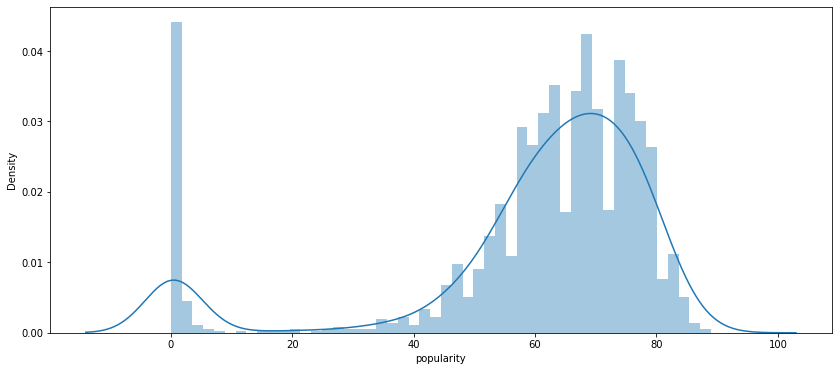

In [10]:
plt.figure(figsize=(14, 6))
sns.distplot(df.popularity,bins=50,kde=True, norm_hist=False)

In [11]:
df.loc[df.popularity == 0]

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
59,Oasis,Go Let It Out,278666,False,2000,0,0.408,0.849,2,-5.631,1,0.0333,0.01360,0.000025,0.5600,0.628,84.192,"Folk/Acoustic, rock"
62,Mariah Carey,Against All Odds (Take A Look at Me Now) (feat...,199480,False,2011,0,0.471,0.514,1,-5.599,1,0.0315,0.58400,0.000000,0.1030,0.373,117.338,"pop, R&B"
126,Jennifer Lopez,Ain't It Funny,246160,False,2001,0,0.707,0.869,5,-4.525,0,0.0481,0.10400,0.000121,0.0813,0.621,99.825,"hip hop, pop, R&B"
175,DB Boulevard,Point Of View - Radio Edit,231166,False,2018,0,0.676,0.715,6,-6.854,1,0.0287,0.00284,0.074600,0.0685,0.275,129.006,Dance/Electronic
182,Musiq Soulchild,Love,304666,False,2000,0,0.569,0.385,1,-9.919,0,0.0499,0.34200,0.000000,0.0876,0.339,99.738,"pop, R&B"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1789,CNCO,Reggaetón Lento (Remix),188786,False,2017,0,0.623,0.909,4,-3.079,0,0.0758,0.15800,0.000000,0.0972,0.651,93.984,"pop, latin"
1794,Shawn Mendes,Mercy,208733,False,2017,0,0.561,0.674,4,-4.882,0,0.0818,0.11800,0.000000,0.1110,0.383,148.127,pop
1850,Loud Luxury,Body (feat. brando),163216,False,2017,0,0.752,0.764,1,-4.399,1,0.0380,0.04760,0.000094,0.0543,0.582,121.958,"pop, Dance/Electronic"
1913,NLE Choppa,Shotta Flow (feat. Blueface) [Remix],176631,True,2019,0,0.894,0.511,2,-4.768,1,0.4200,0.02510,0.000000,0.1400,0.568,120.080,hip hop


In [12]:
df.sort_values('popularity', axis=0, ascending=True)['artist'].head(20)

860               Mariah Carey
1626               Cheat Codes
1617                  Astrid S
778                  Jim Jones
1750            Kendrick Lamar
1751    A Boogie Wit da Hoodie
1922                     Mabel
1602             Justin Bieber
1600                The Weeknd
835                Miley Cyrus
1721        Axwell /\ Ingrosso
1727              Travis Scott
1757             Martin Jensen
1913                NLE Choppa
899                     T-Pain
1591                     BØRNS
1589                      Zedd
1585            Ellie Goulding
1106            Alexandra Stan
1543             Years & Years
Name: artist, dtype: object

In [13]:
df.sort_values('popularity', axis=0, ascending=True)['artist'].tail(20)

1344       Arctic Monkeys
1326       Arctic Monkeys
1700           Ed Sheeran
1511           The Weeknd
1910        Lewis Capaldi
1905        Gesaffelstein
1227           Bruno Mars
1304           Bruno Mars
1999          Post Malone
1512    The Neighbourhood
1514               Avicii
1709           Ed Sheeran
209                Eminem
1929        Billie Eilish
1613               WILLOW
6                  Eminem
1819        Billie Eilish
201                Eminem
1311            Tom Odell
1322    The Neighbourhood
Name: artist, dtype: object

In [14]:
df.sort_values('popularity', axis=0, ascending=True)['song'].head(20)

860                            Touch My Body
1626                                     Sex
1617                           Hurts So Good
778                              We Fly High
1750                                    DNA.
1751            Drowning (feat. Kodak Black)
1922                                Mad Love
1602                           Love Yourself
1600                                 Starboy
835                            See You Again
1721                      More Than You Know
1727                        BUTTERFLY EFFECT
1757                              Solo Dance
1913    Shotta Flow (feat. Blueface) [Remix]
899      Can't Believe It (feat. Lil' Wayne)
1591                           Electric Love
1589                      I Want You To Know
1585                              On My Mind
1106                            Mr. Saxobeat
1543                                    King
Name: song, dtype: object

In [15]:
df.sort_values('popularity', axis=0, ascending=True)['song'].tail(20)

1344                            Do I Wanna Know?
1326    Why'd You Only Call Me When You're High?
1700                                Shape of You
1511                                   The Hills
1910                           Someone You Loved
1905         Lost in the Fire (feat. The Weeknd)
1227                        Locked out of Heaven
1304                        Locked out of Heaven
1999                                     Circles
1512                                Daddy Issues
1514                                  The Nights
1709                                     Perfect
209                             'Till I Collapse
1929                        lovely (with Khalid)
1613                              Wait a Minute!
6                            The Real Slim Shady
1819                        lovely (with Khalid)
201                                   Without Me
1311                                Another Love
1322                             Sweater Weather
Name: song, dtype: o

In [16]:
# Longest Song
df.iloc[df.duration_ms.idxmax()]

artist              Justin Timberlake
song                          Mirrors
duration_ms                    484146
explicit                        False
year                             2013
popularity                         78
danceability                    0.574
energy                          0.512
key                                 5
loudness                       -6.664
mode                                0
speechiness                    0.0503
acousticness                    0.234
instrumentalness                  0.0
liveness                       0.0946
valence                         0.512
tempo                          76.899
genre                             pop
Name: 1381, dtype: object

In [17]:
# Most Popular Song
df.iloc[df.popularity.idxmax()]

artist              The Neighbourhood
song                  Sweater Weather
duration_ms                    240400
explicit                        False
year                             2013
popularity                         89
danceability                    0.612
energy                          0.807
key                                10
loudness                        -2.81
mode                                1
speechiness                    0.0336
acousticness                   0.0495
instrumentalness               0.0177
liveness                        0.101
valence                         0.398
tempo                         124.053
genre                       rock, pop
Name: 1322, dtype: object

In [18]:
#Highest Loudness
df.iloc[df.loudness.idxmax()]

artist                            La Roux
song                      In For The Kill
duration_ms                        248626
explicit                            False
year                                 2009
popularity                             59
danceability                        0.629
energy                              0.969
key                                     8
loudness                           -0.276
mode                                    0
speechiness                        0.0455
acousticness                      0.00184
instrumentalness                      0.0
liveness                            0.122
valence                             0.905
tempo                              150.01
genre               pop, Dance/Electronic
Name: 971, dtype: object

In [19]:
#Highest speechiness
df.iloc[df.speechiness.idxmax()]

artist                             MiMS
song                This Is Why I'm Hot
duration_ms                      253706
explicit                           True
year                               2007
popularity                           59
danceability                      0.621
energy                              0.6
key                                   8
loudness                         -6.349
mode                                  1
speechiness                       0.576
acousticness                      0.277
instrumentalness                    0.0
liveness                          0.495
valence                           0.485
tempo                            80.021
genre                      hip hop, pop
Name: 736, dtype: object

In [20]:
#Highest acousticness
df.iloc[df.acousticness.idxmax()]

artist                                     Gary Jules
song                Mad World (Feat. Michael Andrews)
duration_ms                                    189506
explicit                                        False
year                                             2001
popularity                                         65
danceability                                    0.345
energy                                         0.0581
key                                                 3
loudness                                      -17.217
mode                                                1
speechiness                                    0.0374
acousticness                                    0.976
instrumentalness                             0.000366
liveness                                        0.103
valence                                         0.304
tempo                                         174.117
genre                                             pop
Name: 496, dtype: object

In [21]:
#Lowest acousticness
df.iloc[df.acousticness.idxmin()]

artist                                            Electric Six
song                Danger! High Voltage - Soulchild Radio Mix
duration_ms                                             214600
explicit                                                 False
year                                                      2003
popularity                                                   0
danceability                                              0.66
energy                                                   0.698
key                                                         11
loudness                                                -4.722
mode                                                         0
speechiness                                             0.0302
acousticness                                          0.000019
instrumentalness                                         0.166
liveness                                                0.0517
valence                                                

In [22]:
#Highest instrumentalness
df.iloc[df.instrumentalness.idxmax()]

artist                             Darude
song                            Sandstorm
duration_ms                        225493
explicit                            False
year                                 2001
popularity                             69
danceability                        0.528
energy                              0.965
key                                    11
loudness                           -7.984
mode                                    0
speechiness                        0.0465
acousticness                        0.141
instrumentalness                    0.985
liveness                           0.0797
valence                             0.587
tempo                             136.065
genre               pop, Dance/Electronic
Name: 26, dtype: object

In [23]:
#Lowest instrumentalness
df.iloc[df.instrumentalness.idxmin()]

artist                         blink-182
song                All The Small Things
duration_ms                       167066
explicit                           False
year                                1999
popularity                            79
danceability                       0.434
energy                             0.897
key                                    0
loudness                          -4.918
mode                                   1
speechiness                       0.0488
acousticness                      0.0103
instrumentalness                     0.0
liveness                           0.612
valence                            0.684
tempo                            148.726
genre                          rock, pop
Name: 1, dtype: object

In [24]:
#Highest liveness
df.iloc[df.liveness.idxmax()]

artist                          Michel Teló
song                Ai Se Eu Te Pego - Live
duration_ms                          166866
explicit                              False
year                                   2012
popularity                                0
danceability                          0.676
energy                                0.935
key                                      11
loudness                              -4.55
mode                                      1
speechiness                          0.0692
acousticness                          0.357
instrumentalness                        0.0
liveness                              0.853
valence                                0.85
tempo                                96.055
genre                        country, latin
Name: 1240, dtype: object

In [25]:
#Lowest liveness
df.iloc[df.liveness.idxmin()]

artist                                  Bruno Mars
song                Finesse - Remix; feat. Cardi B
duration_ms                                 217288
explicit                                     False
year                                          2017
popularity                                      74
danceability                                 0.704
energy                                       0.859
key                                              5
loudness                                    -4.877
mode                                             0
speechiness                                 0.0996
acousticness                                0.0185
instrumentalness                               0.0
liveness                                    0.0215
valence                                      0.926
tempo                                      105.115
genre                                          pop
Name: 1882, dtype: object

In [26]:
df_pop = df[df.genre == 'pop']
df_pop.shape

(428, 18)

In [27]:
df_pop.artist.value_counts().head(10)

Britney Spears       19
Katy Perry           16
Taylor Swift         16
P!nk                 15
Ariana Grande        14
Maroon 5             13
Bruno Mars           12
Justin Timberlake    12
Lady Gaga            11
Justin Bieber        10
Name: artist, dtype: int64

In [28]:
df_pop.artist.value_counts().tail(10)

PSY                 1
Charli Baltimore    1
DJ Sammy            1
Labrinth            1
Matt Cardle         1
Kris Allen          1
Big Brovaz          1
A1                  1
INNA                1
BTS                 1
Name: artist, dtype: int64

<AxesSubplot:xlabel='year'>

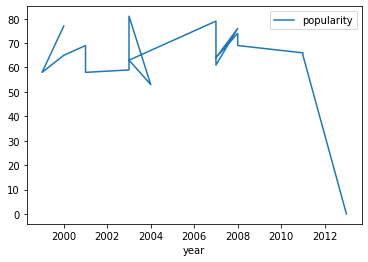

In [29]:
df_Britney = df_pop[df_pop.artist == 'Britney Spears']
df_Britney.plot(x='year', y='popularity')

<AxesSubplot:xlabel='year'>

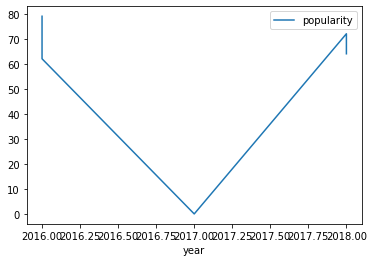

In [30]:
df_CPuth = df_pop[df_pop.artist == 'Charlie Puth']
df_CPuth.plot(x='year', y='popularity')

<AxesSubplot:>

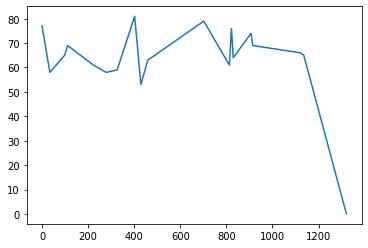

In [31]:
df_Britney.popularity.plot()